In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Verifica se há GPU disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Files already downloaded and verified


/home/lorran/github/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/lorran/github/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.490453..1.82].


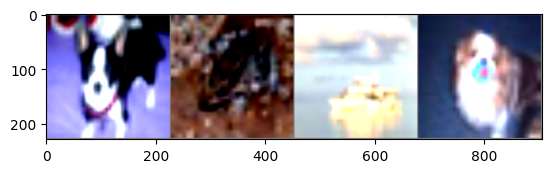

IndexError: list index out of range

In [3]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np

# Verifica se há GPU disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformações: redimensionar e normalizar as imagens
transform = transforms.Compose([
    transforms.Resize(224),  # ResNet espera entradas de 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Baixa o conjunto de dados CIFAR-10
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=True)

# Baixa o modelo ResNet-18 pré-treinado
model = models.resnet18(pretrained=True)
model = model.to(device)
model.eval()  # Coloca o modelo em modo de avaliação

# Função para visualizar as imagens
def imshow(img):
    img = img / 2 + 0.5  # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Função para classificar um lote de imagens
def classify_images():
    dataiter = iter(test_loader)
    
    # Pega o próximo lote de imagens e labels
    images, labels = next(dataiter)

    # Mostra as imagens
    imshow(torchvision.utils.make_grid(images))

    # Move as imagens para o dispositivo
    images = images.to(device)

    # Realiza a inferência
    outputs = model(images)

    # Pega as classes de maior pontuação
    _, predicted = torch.max(outputs, 1)

    # Mapeia os índices das classes para os nomes reais
    classes = test_dataset.classes

    # Garante que o loop itera apenas sobre o número real de imagens/previsões
    num_images = len(predicted)

    print('Predicted:', ' '.join(f'{classes[predicted[j]]}' for j in range(num_images)))

# Chama a função de classificação
classify_images()
